<a href="https://colab.research.google.com/github/yustinaivanova/netology_statistics/blob/master/dz_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнее задание по статистическому анализу на python

In [172]:
import pandas as pd
import numpy as np
from fbprophet import Prophet
import matplotlib.pyplot as plt
import scipy.stats as sts
import seaborn as sns
%matplotlib inline
import statistics
from scipy.stats import pearsonr
from sklearn import preprocessing
pd.options.display.max_rows = 200

Загрузить датасет по url:


In [205]:
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
df=pd.read_csv(url)

Более подробно о датасете можно прочитать по [данной ссылке](https://data.world/promptcloud/world-happiness-report-2019) или по [ссылке в kaggle](https://www.kaggle.com/PromptCloudHQ/world-happiness-report-2019)

Context

The World Happiness Report is a landmark survey of the state of global happiness that ranks 156 countries by how happy their citizens perceive themselves to be. This year’s World Happiness Report focuses on happiness and the community: how happiness has evolved over the past dozen years, with a focus on the technologies, social norms, conflicts and government policies that have driven those changes.



*  **Country (region)** Name of the country.
*  **Ladder** Cantril Ladder is a measure of life satisfaction.
*  **SD of Ladder** Standard deviation of the ladder.
*  **Positive affect** Measure of positive emotion.
*  **Negative affect** Measure of negative emotion.
*  **Social support** The extent to which Social support contributed to the calculation of the Happiness Score.
*  **Freedom** The extent to which Freedom contributed to the calculation of the Happiness Score.
*  **Corruption** The extent to which Perception of Corruption contributes to Happiness Score.
*  **Generosity** The extent to which Generosity contributed to the calculation of the Happiness Score.
*  **Log of GDP per capita** The extent to which GDP contributes to the calculation of the Happiness Score.
*  **Healthy life expectancy** The extent to which Life expectancy contributed to the calculation of the Happiness Score.

Посмотреть первые несколько рядов таблицы

In [206]:
df.head()

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


Построить частотный график для двух параметров: Freedom и positive affect. Какое это распределение?

/Users/user/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning:

invalid value encountered in greater_equal

/Users/user/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning:

invalid value encountered in less_equal



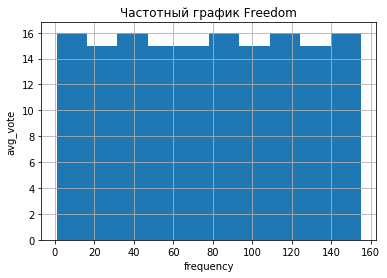

In [207]:
n, bins, patches = plt.hist(df['Freedom'], 10)

plt.xlabel('frequency')
plt.ylabel('avg_vote')
plt.title('Частотный график Freedom')
plt.grid(True)
plt.show()

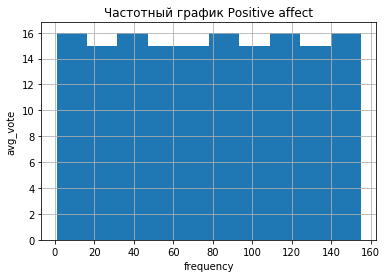

In [208]:
n, bins, patches = plt.hist(df['Positive affect'], 10)

plt.xlabel('frequency')
plt.ylabel('avg_vote')
plt.title('Частотный график Positive affect')
plt.grid(True)
plt.show()

In [209]:
# распределение равномерное

Найти медиану, моду, математическое ожидание, стандартное отклонение,  дисперсию, минимум и максимум, найти выбросы (если есть), размах для колонки Freedom

In [210]:
# statistics.median(df['Freedom'])
df['Freedom'].median()

78.0

In [211]:
# statistics.mode(df['Freedom'])
df['Freedom'].mode().values[0]

1.0

In [212]:
df['Freedom'].mean()

78.0

In [213]:
df['Freedom'].std()

44.88875137492688

In [214]:
df['Freedom'].var()

2015.0

In [215]:
min(df['Freedom'])

1.0

In [216]:
max(df['Freedom'])

155.0

In [217]:
# df['Freedom'].values

In [218]:
max(df['Freedom'])-min(df['Freedom'])

154.0

In [219]:
# выбросы значение null, вставим вместо него средние значения
df['Freedom'] = df['Freedom'].fillna(df['Freedom'].mean())
df['Positive affect'] = df['Positive affect'].fillna(df['Positive affect'].mean())

Почему нельзя найти моду?

In [220]:
# тк все значения встречаются по одному разу

Посмотреть корреляцию между Freedom и positive affect (графически и математически). Графически - plt.scatter, математически - посчитать коэффициент Пирсона. О чем говорит знак коэффициента?

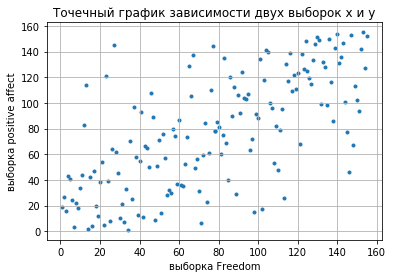

In [221]:
plt.xlabel('выборка Freedom')
plt.ylabel('выборка positive affect')
plt.title('Точечный график зависимости двух выборок x и y')
plt.grid(True)
plt.scatter(df['Freedom'], df['Positive affect'], marker='.')

In [222]:
corr, p_value = pearsonr(df['Freedom'].fillna(df['Freedom'].mean()),\
                         df['Positive affect'].fillna(df['Positive affect'].mean()))

corr

0.6817698430601657

Нормализовать данные колонки Freedom (централизация + масштабирование)

In [223]:
df['Freedom'] = df['Freedom'] - df['Freedom'].mean()


In [224]:
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))
df['Freedom'] = min_max_scaler.fit_transform(np.array(freedom_norm).reshape(-1, 1))
print(min(freedom_norm))
print(max(freedom_norm))

[-1.]
[1.]


Построить матрицу корреляций для всех колонок таблицы

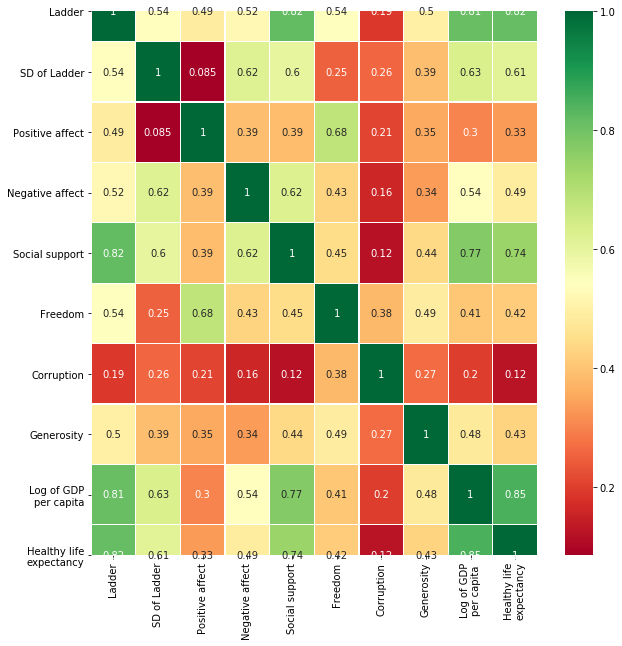

In [226]:
sns.heatmap(df.corr(),
            annot=True,
            cmap='RdYlGn',
            linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(10,10)

В данном датасете некоторые атрибуты значительно коррелируют. Какие? Почему?

In [227]:
# положительно коррелируют ВВП/дн, удовлетворенность жизнью, социальная поддержка, продолжительность жизни (попарно)
# они коррелируют потому что это факторы которые присущи государствам с высоким уровнем развития


Загрузить таблицу цен на авокадо: 

In [228]:
import io
import requests
url="http://yustiks.ru/avocado.csv"
df=pd.read_csv(url)
df[:3]

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany


Сделать частотный график колонки AveragePrice. Какое это распределение?

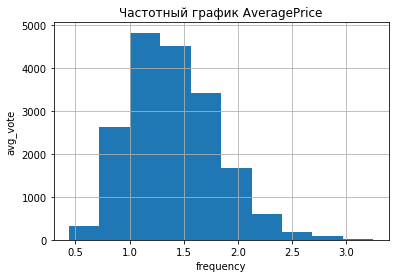

In [229]:
n, bins, patches = plt.hist(df['AveragePrice'], 10)

plt.xlabel('frequency')
plt.ylabel('avg_vote')
plt.title('Частотный график AveragePrice')
plt.grid(True)
plt.show()

Найти корреляцию в следующих колонках:

колонкой 4046, 4225, 4770 и Average Price. Если корелляция есть (обратная или прямая), то какие выводы можно сделать?

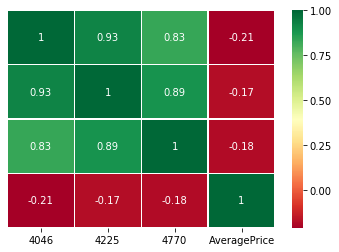

In [230]:
sns.heatmap(df[['4046','4225','4770', 'AveragePrice']].corr(),
            annot=True,  
            yticklabels=False,
            cmap='RdYlGn',
            linewidths=0.2)


Написать временные предсказания цен на авокадо типа organic для выбранного региона: LasVegas, начиная с августа 2017 года до конца марта 2018. В качестве тренировочных данных использовать данные до июля 2017 года включительно.
В качестве примера использовать лекционный материал в lecture_1.ipynb

In [231]:
df['Date'] = pd.to_datetime(df['Date'])
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [232]:
PREDICTION_TYPE = 'organic'
df_org = df[df.type == PREDICTION_TYPE]
# df_org.head()

In [233]:
regions = df_org\
.groupby(df_org['region'])
# regions.head()

In [234]:
PREDICTING_FOR = "LasVegas"
date_price = regions.get_group(PREDICTING_FOR)[['Date', 'AveragePrice']].reset_index(drop=True)

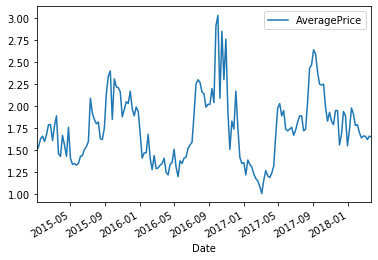

In [235]:
date_price.plot(x='Date', y='AveragePrice', kind="line")

In [236]:
date_price = date_price.rename(columns={'Date':'ds', 'AveragePrice':'y'})

In [237]:
date_price = date_price.sort_values(by='ds')
# date_price.head()

In [238]:
train_price = date_price[date_price['ds'] < '2017-08-01']
test_price = date_price[(date_price['ds'] >= '2017-08-01') & (date_price['ds'] < '2018-04-01')]

In [239]:
m = Prophet()
m.fit(train_price)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [240]:
future = m.make_future_dataframe(periods=240)
forecast = m.predict(future)

In [241]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-04,1.784346,1.210381,1.791691,1.784346,1.784346,-0.279689,-0.279689,-0.279689,-0.279689,-0.279689,-0.279689,0.0,0.0,0.0,1.504657
1,2015-01-11,1.783778,1.209364,1.776421,1.783778,1.783778,-0.285370,-0.285370,-0.285370,-0.285370,-0.285370,-0.285370,0.0,0.0,0.0,1.498408
2,2015-01-18,1.783211,1.235498,1.819073,1.783211,1.783211,-0.278175,-0.278175,-0.278175,-0.278175,-0.278175,-0.278175,0.0,0.0,0.0,1.505035
3,2015-01-25,1.782643,1.216001,1.781485,1.782643,1.782643,-0.275927,-0.275927,-0.275927,-0.275927,-0.275927,-0.275927,0.0,0.0,0.0,1.506716
4,2015-02-01,1.782075,1.231358,1.803280,1.782075,1.782075,-0.276166,-0.276166,-0.276166,-0.276166,-0.276166,-0.276166,0.0,0.0,0.0,1.505909


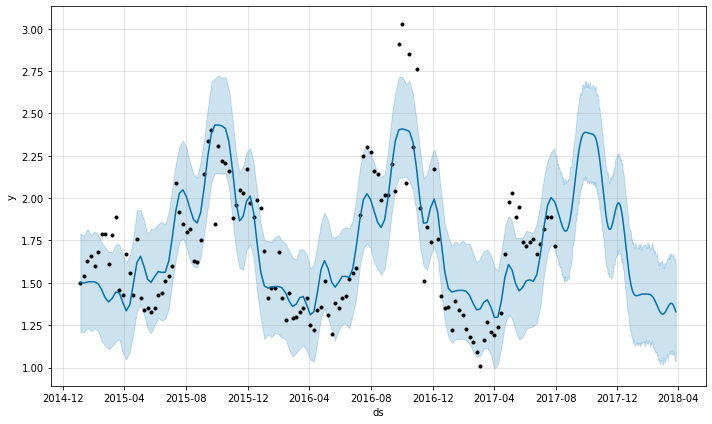

In [242]:
fig1 = m.plot(forecast)

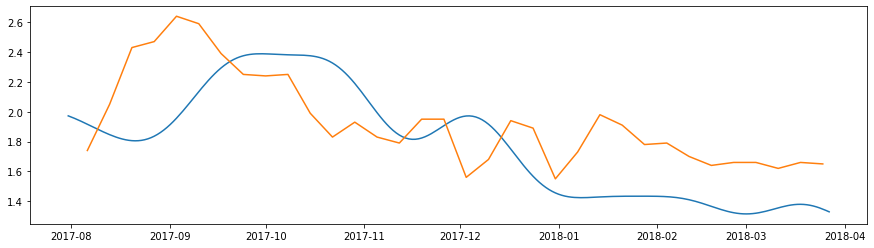

In [243]:
plt.figure(figsize=(15,4))
forecast_future = forecast.iloc[135:,:]
plt.plot(forecast_future['ds'], forecast_future['yhat'])
plt.plot(test_price['ds'], test_price['y'])
plt.show()